In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [2]:
df = pd.read_csv(r'E:\Analytics\Projects\Customer Churn Analysis using Tensorflow & Keras\Customer_Churn.csv')

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(["CustomerId","Surname"], axis=1, inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Churned          10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
df_encoded = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)

In [8]:
x = df_encoded.drop("Churned", axis=1)
y = df_encoded["Churned"]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
rf = RandomForestClassifier(n_estimators=128, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=128, random_state=42)

In [14]:
y_pred = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print("RF Accuracy", rf_accuracy)

RF Accuracy 0.869


In [16]:
confusion_matrix(y_test, y_pred)

array([[1552,   55],
       [ 207,  186]], dtype=int64)

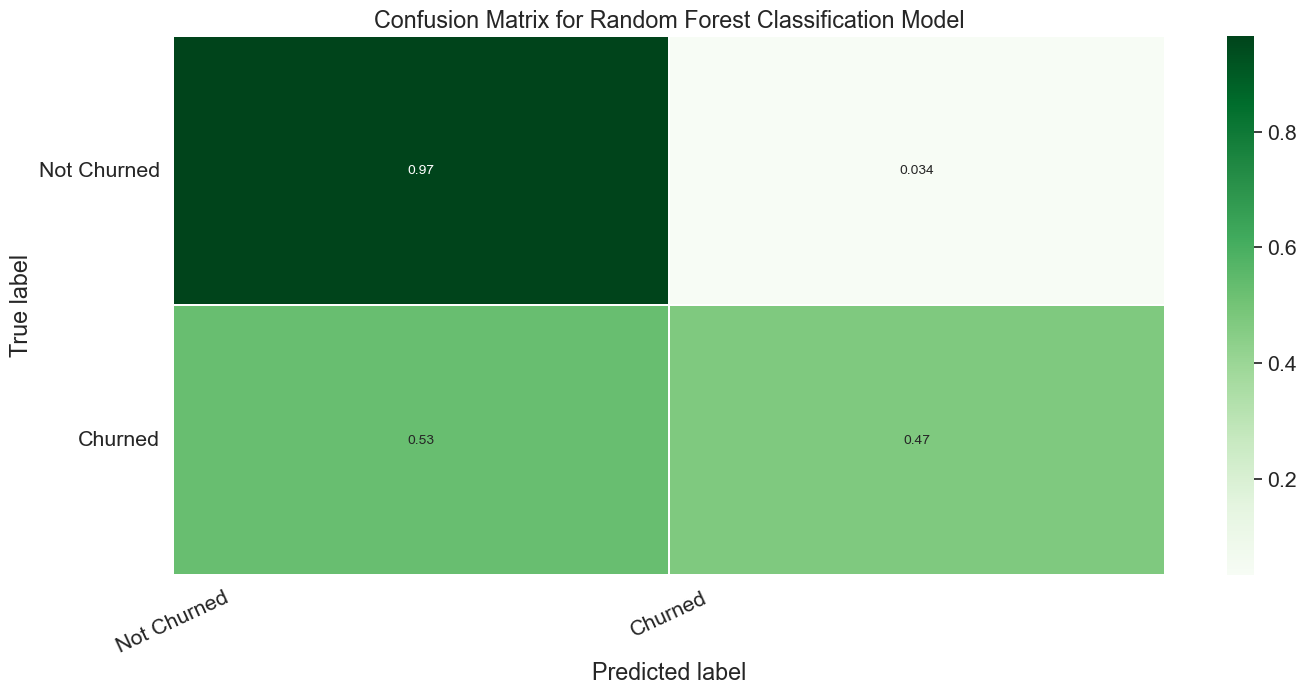

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.47      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000

RF Accuracy 0.869


In [21]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Not Churned', 'Churned']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Classification Model')
plt.show()

print(classification_report(y_test, y_pred))

y_pred = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print("RF Accuracy", rf_accuracy)
